In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Goal of the Analysis
- Predict whether passager will live or die in the titanic using the training set against the test set.

## Plan
- Print the all the data I have to see in what format it is
- Transform some of the features into a suitable format (the most troublesome)
- Visualize the distribution of the labels
- Visualize some basic statistics of each features (min, max, mean, standard deviation)
- Visualize how correlated the features are with the label

In [2]:
# Loading the data
test_data = pd.read_csv("data/test.csv") 
train_data = pd.read_csv("data/train.csv") 
gender_result = pd.read_csv("data/gender_submission.csv") 

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
gender_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Label
### Survived
0 means didn't surived and 1 means the person survived

## Features Explanation
### pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

### Name
The name of the embarkee (could do some nlp there)

### Sex
The sex of the embarkee (could codify this into 0 for male and 1 for female)

### age:
- Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored) 

This is the number of spouse or sibling on the boat

### parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
This is the number of child or parent on board the boat

### Ticket
The ticket number (There are some letters and numbers in there)

### Fare
The price of the ticket

### Cabin
The number of the cabin, if none we will have a NaN

### Embarked
Port of embarkation C = Cherbourg, Q = Queenstown, S = Southampton
(we could do a encoding there since we have only three value)

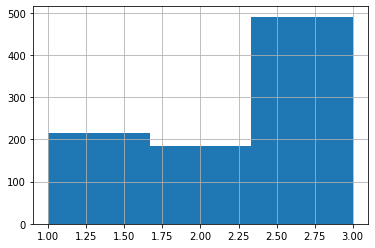

In [6]:
'''
    To start the analysis and do a first foray into the problem
    we will use a reduced set of features that are easy to work with.
    
    Selected features:
    - pclass
    - sex
    - age
    - sibsp
    - parch 
    - fare
''' 

# Pclass
train_data['Pclass'].hist(bins=3)
plt.show()

There seems to be a lot more pclass = 3, which is lower class than 1 and 2.
I might want to transform this data from 0 to 1 (which will be an index of poverty)

In [8]:
# Conver the Sex category (Male == 1 and Female == 0)
train_data["Sex"] = train_data["Sex"].astype('category')
train_data["sex_code"] = train_data["Sex"].cat.codes
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
